# Convert the HDF5 File

In [21]:
import h5py
import numpy as np
import json
import struct

def convert_hdf5_to_binary(input_file, output_prefix):
  with h5py.File(input_file, 'r') as f:
    train = f['train'][:]
    test = f['test'][:]
    neighbours = f['neighbors'][:]

    train = train.astype(np.float32)
    test = test.astype(np.float32)
    neighbours = neighbours.astype(np.int32)

    metadata = {
      'train_shape': train.shape,
      'test_shape': test.shape,
      'neighbours_shape': neighbours.shape
    }

    with open(f'./{output_prefix}/{output_prefix}_metadata.json', 'w') as mf:
      json.dump(metadata, mf)

    train.tofile(f'./{output_prefix}/{output_prefix}_train.bin')
    test.tofile(f'./{output_prefix}/{output_prefix}_test.bin')
    neighbours.tofile(f'./{output_prefix}/{output_prefix}_neighbors.bin')

In [22]:
convert_hdf5_to_binary('./nytimes-256-angular/nytimes-256-angular.hdf5', 'nytimes-256-angular')

# Plot Final Results

In [ ]:
import json
import os
import glob

def read_benchmark_results(folder_path):
    json_path = os.path.join(folder_path, "benchmark_results.json")    
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    results = []
    for param, case in data['cases'].items():
        results.append({
            "qps": round(case["search_qps"], 2),
            "recall": round(case["recall"], 4),
            "param": param
        })

    return results

datasets = {}
dataset_folders = glob.glob("*-*-*")
for folder in dataset_folders:
    results = read_benchmark_results(folder)
    if results:
        datasets[folder] = results

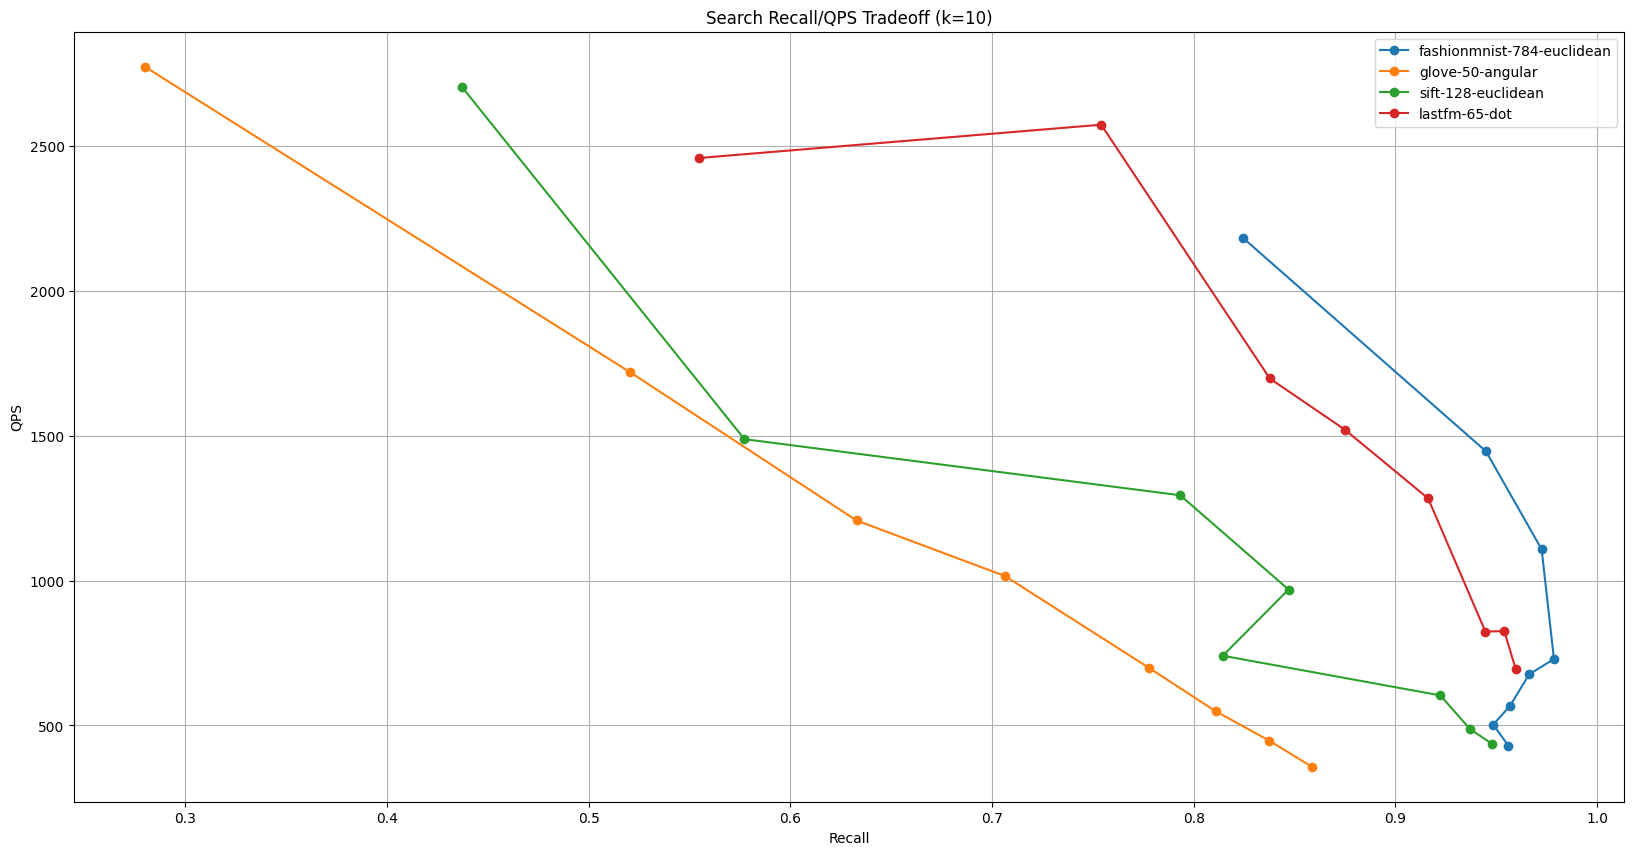

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for dataset_name, data in datasets.items():
  recall = [d["recall"] for d in data]
  qps = [d["qps"] for d in data]
  params = [d["param"] for d in data]
  
  plt.plot(recall, qps, marker='o', label=dataset_name)
  
  for i, param in enumerate(params):
    plt.annotate(param, (recall[i], qps[i]), textcoords="offset points", xytext=(5, -10), ha='center')

plt.xlabel("Recall")
plt.ylabel("QPS")
plt.title("Search Recall/QPS Tradeoff (k=10)")
plt.legend()
plt.grid(True)
plt.show()